<a href="https://colab.research.google.com/github/insomnia98/2021_AI_Python/blob/main/week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
file_path = "/content/data_lab1 (1).txt"

col_name = ['x','y']

df = pd.read_csv(file_path, sep=' ', names=col_name)

In [ ]:
x_train = df['x'].values.reshape(-1,1)
y_train = df['y'].values.reshape(-1,1)

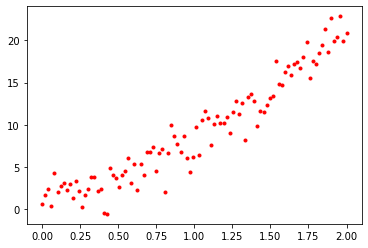

In [ ]:
plt.plot(x_train,y_train,'r.')

# Model

In [ ]:
class LinearRegressor:
    
    def __init__(self, opt='bgd', lr=0.001):
        self.opt     = opt
        self.lr      = lr
        self.weight  = None
        self.history = []
    
    def fit(self, x, t, epochs=200, print_step=10):
        assert x.shape[0] == t.shape[0]
        assert len(x.shape) == 2
        
        self.num, self.dim = x.shape
        
        x = np.concatenate((np.ones((self.num, 1)), x), axis=1)
        self.weight = np.random.randn(self.dim+1)
        
        for epoch in range(1, epochs+1):
            y = self.forward(x)
            self.backward(x, y, t)            
            
            if epoch % print_step == 0:
                err = self.error(y, t)
                print(f'epoch: {epoch}  sse: {err}')
                self.history.append(err)
        
    
    def forward(self, x):
        y = [self.pred(xi) for xi in x]
        
        return np.array(y).reshape(-1, 1)
        
        
    def pred(self, xi):
        assert self.weight.shape == xi.shape
        
        return np.dot(self.weight, xi)
    
    
    def error(self, y, t):
        assert y.shape == t.shape
        
        return ((y - t)**2).sum() / 2
    
    
    def backward(self, x, y, t):
        
        if self.opt == 'bgd':
            for n in range(self.dim+1):
                g = 0.
                for i in range(self.num):
                    g += (y[i] - t[i]) * x[i][n]
                self.weight[n] -= self.lr * g
        
        elif self.opt == 'sgd':
            for n in range(self.dim+1):
                i = np.random.randint(self.num)
                g = (y[i] - t[i]) * x[i][n]
                self.weight[n] -= self.lr * g

In [ ]:
bgd = LinearRegressor(opt='bgd')

bgd.fit(x_train, y_train, epochs=200)

print('weight :', bgd.weight)

epoch: 10  sse: 773.1853825944147
epoch: 20  sse: 564.3911674352802
epoch: 30  sse: 461.38713641134603
epoch: 40  sse: 386.4848783517541
epoch: 50  sse: 331.759602711354
epoch: 60  sse: 291.7742097250469
epoch: 70  sse: 262.55859818880737
epoch: 80  sse: 241.21200390499268
epoch: 90  sse: 225.61496302247414
epoch: 100  sse: 214.218874210522
epoch: 110  sse: 205.8922408966692
epoch: 120  sse: 199.80832706557942
epoch: 130  sse: 195.36307216975666
epoch: 140  sse: 192.11511507545026
epoch: 150  sse: 189.74197213231605
epoch: 160  sse: 188.00801836844997
epoch: 170  sse: 186.7410927228947
epoch: 180  sse: 185.81540449243874
epoch: 190  sse: 185.1390438054396
epoch: 200  sse: 184.6448560607248
weight : [-0.63495173  9.97218402]


In [ ]:
sgd = LinearRegressor(opt='sgd')

sgd.fit(x_train, y_train, epochs=2000, print_step=100)

print('weight :', sgd.weight)

epoch: 100  sse: 2568.8299547735883
epoch: 200  sse: 1809.3120039628757
epoch: 300  sse: 1318.7155396690982
epoch: 400  sse: 1058.5232937497067
epoch: 500  sse: 894.0649878830159
epoch: 600  sse: 761.8861354411927
epoch: 700  sse: 675.5048611552684
epoch: 800  sse: 619.3713580474482
epoch: 900  sse: 574.101202108562
epoch: 1000  sse: 540.9916396617633
epoch: 1100  sse: 529.8692299606043
epoch: 1200  sse: 507.6637508104247
epoch: 1300  sse: 483.3824208560116
epoch: 1400  sse: 471.25323619937586
epoch: 1500  sse: 463.300230613281
epoch: 1600  sse: 454.19031287580964
epoch: 1700  sse: 438.007653850781
epoch: 1800  sse: 425.48787551769226
epoch: 1900  sse: 423.36624865638186
epoch: 2000  sse: 421.9555589466154
weight : [3.19840012 6.59262666]


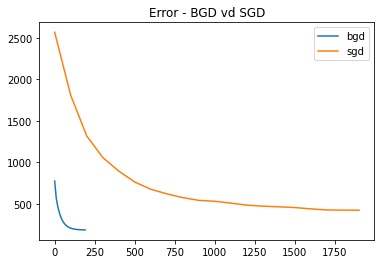

Final error
BGD : 184.6448560607248
SGD : 421.9555589466154


In [ ]:
plt.plot(range(0, 200, 10), bgd.history, label='bgd')
plt.plot(range(0, 2000, 100), sgd.history, label='sgd')

plt.title('Error - BGD vd SGD')
plt.legend()
plt.show()

print('Final error')
print('BGD :', bgd.history[-1])
print('SGD :', sgd.history[-1])

In [ ]:
def plot_line(w, x, label):
    y = [w[0] + w[1] * xi for xi in x]
    plt.plot(x, y, label=label)

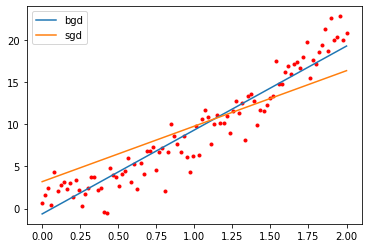

In [ ]:
x = np.linspace(0, 2)

plt.plot(x_train, y_train, 'r.')
plot_line(bgd.weight, x, 'bgd')
plot_line(sgd.weight, x, 'sgd')

plt.legend()
plt.show()